## Voronoi Polygons for 2-D Point Sets

Author: Serge Rey (http://github.com/sjsrey)


### Basic Usage

In [24]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

In [25]:
from libpysal.cg.voronoi  import voronoi, voronoi_frames

In [26]:
points = [(10.2, 5.1), (4.7, 2.2), (5.3, 5.7), (2.7, 5.3)]

In [27]:
regions, vertices = voronoi(points)

In [28]:
regions

[[1, 3, 2], [4, 5, 1, 0], [0, 1, 7, 6], [9, 0, 8]]

In [29]:
vertices

array([[  4.21783296,   4.08408578],
       [  7.51956025,   3.51807539],
       [  9.4642193 ,  19.3994576 ],
       [ 14.98210684, -10.63503022],
       [ -9.22691341,  -4.58994414],
       [ 14.98210684, -10.63503022],
       [  1.78491801,  19.89803294],
       [  9.4642193 ,  19.3994576 ],
       [  1.78491801,  19.89803294],
       [ -9.22691341,  -4.58994414]])

In [30]:
region_df, point_df = voronoi_frames(points)

In [31]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

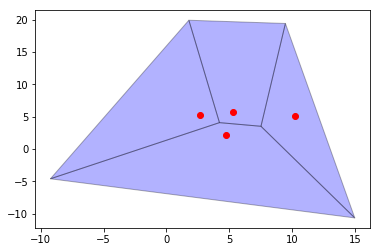

In [32]:
fig, ax = plt.subplots()
region_df.plot(ax=ax, color='blue',edgecolor='black', alpha=0.3)
point_df.plot(ax=ax, color='red')


### Larger Problem

In [33]:
n_points = 200
np.random.seed(12345)
points = np.random.random((n_points,2))*10 + 10
results = voronoi(points)
mins = points.min(axis=0)
maxs = points.max(axis=0)

In [34]:
regions, vertices = voronoi(points)

In [35]:
regions_df, points_df = voronoi_frames(points)

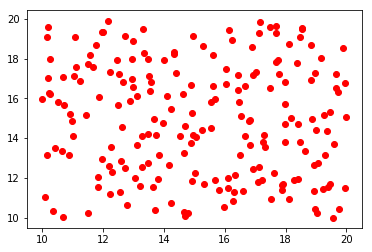

In [36]:
fig, ax = plt.subplots()
points_df.plot(ax=ax, color='red')

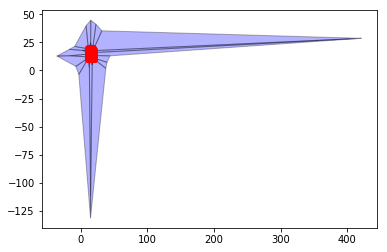

In [37]:
fig, ax = plt.subplots()
regions_df.plot(ax=ax, color='blue',edgecolor='black', alpha=0.3)
points_df.plot(ax=ax, color='red')

### Trimming

In [38]:
points = np.array(points)
maxs = points.max(axis=0)
mins = points.min(axis=0)
xr = maxs[0] - mins[0]
yr = maxs[1] - mins[1]
buff = 0.05
r = max(yr, xr) * buff
minx = mins[0] - r
miny = mins[1] - r
maxx = maxs[0] + r
maxy = maxs[1] + r

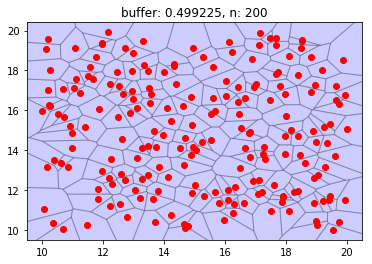

In [39]:
fig, ax = plt.subplots()
regions_df.plot(ax=ax, edgecolor='black', facecolor='blue', alpha=0.2 )
points_df.plot(ax=ax, color='red')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.title("buffer: %f, n: %d"%(r,n_points))
plt.show()


## Voronoi Weights

In [40]:
from libpysal.weights.contiguity import Voronoi as Vornoi_weights

In [41]:
w = Vornoi_weights(points)

In [42]:
w.n

200

In [43]:
w.pct_nonzero

2.915

In [44]:
w.histogram

[(3, 3),
 (4, 28),
 (5, 52),
 (6, 65),
 (7, 34),
 (8, 10),
 (9, 5),
 (10, 2),
 (11, 0),
 (12, 1)]

In [45]:
idx = [i for i in range(w.n) if w.cardinalities[i]==12]

In [46]:
points[idx]

array([[16.50851787, 13.12932895]])